In [4]:
# Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [5]:
# Load Dataset
df_buah = pd.read_excel('fruit.xlsx')

In [6]:
df_buah

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [7]:
# Encoder
label_encoder = LabelEncoder()
df_buah['name_encoded'] = label_encoder.fit_transform(df_buah['name'])

In [8]:
# Fitur dan Target
X = df_buah[['diameter', 'weight', 'red','green','blue']].values  # Hanya 5 fitur
y = df_buah['name_encoded'].values

In [9]:
#Split Dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
# Train Model with Perceptron
classifier = Perceptron(random_state=0, max_iter=10, tol=1e-3)
classifier.fit(x_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(max_iter=10)

In [12]:
# Predict Input dari User
input_features = [[21.26, 2.46, 0.9,11,22]]  
input_scaled = scaler.transform(input_features)
prediction = classifier.predict(input_scaled)

In [13]:
# Hasil Prediksi
predicted_species = label_encoder.inverse_transform(prediction)
print(f"Nama buah yang diprediksi: {predicted_species[0]}")

Nama buah yang diprediksi: grapefruit


In [14]:
# Evaluasi Model
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


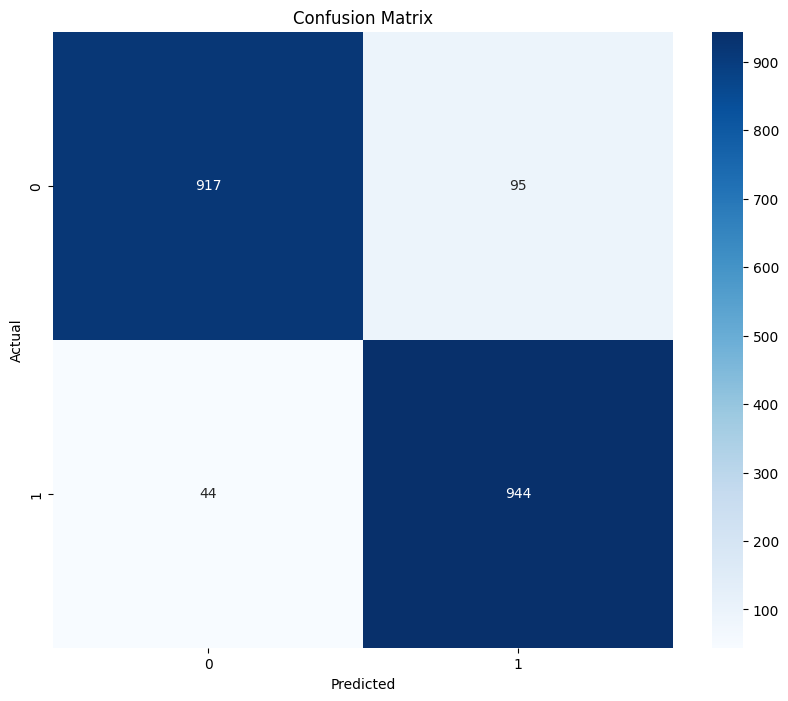

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
import joblib
joblib.dump(classifier, 'perceptron_model_fruit.pkl')
joblib.dump(scaler, 'scaler_fruit.pkl')
joblib.dump(label_encoder, 'label_encoder_fruit.pkl')


['label_encoder_fruit.pkl']